In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("./11-sentimientos/IMDB Dataset SPANISH.csv")

In [5]:
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [6]:
df = df[["sentimiento","review_es"]]

In [7]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

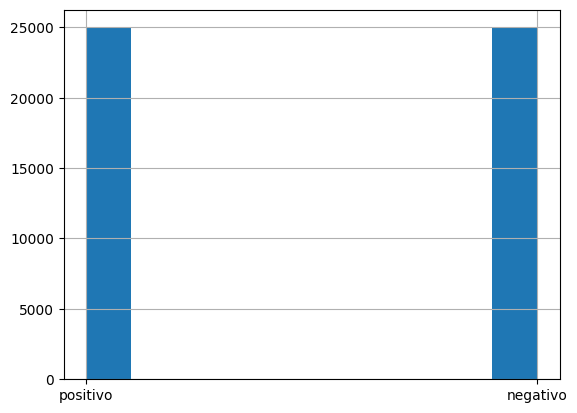

In [8]:
df["sentimiento"].hist()

In [9]:
target_map = {"positivo":1, "negativo":0}

In [10]:
df["target"] = df["sentimiento"].map(target_map)

In [11]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [12]:
df_train, df_test= train_test_split(df)

In [13]:
df_train

,sentimiento,review_es,target
48320,positivo,probablemente la mejor película de terror en 5...,1
14568,positivo,No tienes que ser un fanático del espectáculo ...,1
35282,negativo,(AKA AKA: Castillo de sangre o grito del demon...,0
38720,negativo,Bueno su funcionario.Acaban de matar a America...,0
10853,negativo,Esta película tenía mucho potencial para ser h...,0
...,...,...,...
15478,positivo,Gran película. No hay trucos gratuitos como en...,1
8581,positivo,Una excelente película y un gran ejemplo de cu...,1
12367,negativo,"Bien, qué puedo decir. ¿Qué f ** k? Realmente ...",0
5829,positivo,"""North & South"", la mini serie de televisión e...",1


In [14]:
df_test

,sentimiento,review_es,target
36592,positivo,"Visto las 4 instalaciones, esta es, con mucho,...",1
15406,negativo,Esta película fue decepcionante por al menos u...,0
23945,positivo,"Gran película, suficientes risas y acciones pa...",1
8243,negativo,"** Posos spoilers por delante ** Gerald Mohr, ...",0
29420,positivo,Este trabajo es una revisión audaz en la menta...,1
...,...,...,...
28442,negativo,Seamos realistas aquí.Este es uno de los peore...,0
19047,positivo,"15 Park Avenue es la dirección ""Mithi / Mithal...",1
1888,negativo,Absolutamente nada está canjeando por esta pie...,0
6828,negativo,Encontré esta película extremadamente perturba...,0


In [15]:
vectorizer = TfidfVectorizer(max_features=2000)

In [17]:
X_train = vectorizer.fit_transform(df_train["review_es"])

In [20]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3468673 stored elements in Compressed Sparse Row format>

In [21]:
X_test = vectorizer.transform(df_test["review_es"])

In [22]:
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1150255 stored elements in Compressed Sparse Row format>

In [23]:
Y_train = df_train["target"]
Y_test = df_test["target"]

In [25]:
model = LogisticRegression(max_iter=1000)

In [26]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [27]:
print("Train acc: ", model.score(X_train, Y_train))
print("Test acc: ", model.score(X_test, Y_test))

Train acc:  0.8784533333333333
Test acc:  0.86752


In [28]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [30]:
cm = confusion_matrix(Y_train,P_train,normalize="true")
cm

array([[0.86567883, 0.13432117],
       [0.10884824, 0.89115176]])

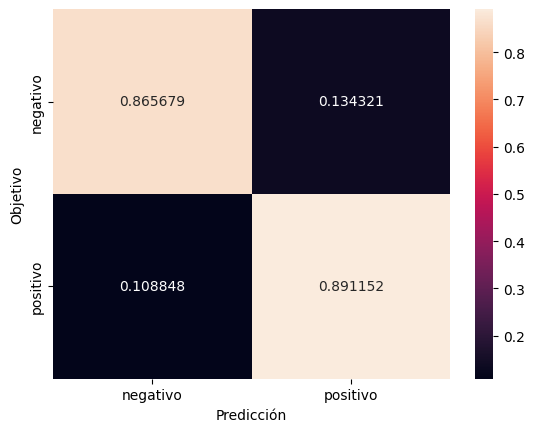

In [32]:
def plot_cm(cm):
    classes = ["negativo", "positivo"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")
    
plot_cm(cm)

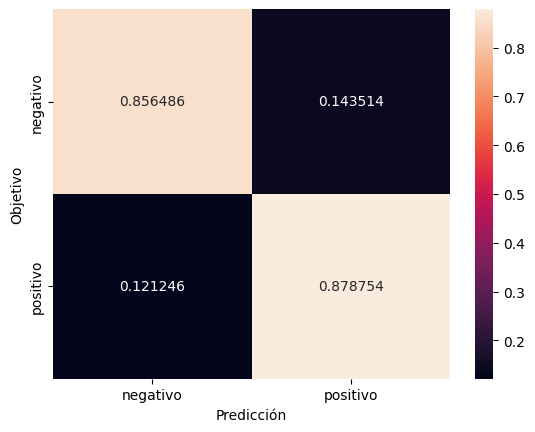

In [34]:
cm = confusion_matrix(Y_test, P_test, normalize="true")
plot_cm(cm)

In [35]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'probablemente': 1462,
 'la': 1022,
 'mejor': 1136,
 'película': 1361,
 'de': 438,
 'terror': 1783,
 'en': 584,
 'años': 167,
 'no': 1248,
 'ha': 830,
 'sido': 1663,
 'los': 1075,
 'intentos': 965,
 'hacer': 847,
 'que': 1509,
 'un': 1869,
 'cuando': 409,
 'lo': 1065,
 'único': 1999,
 'hacen': 846,
 'es': 622,
 'salir': 1605,
 'del': 458,
 'teatro': 1759,
 'las': 1028,
 'películas': 1362,
 'se': 1616,
 'debería': 442,
 'haber': 831,
 'hecho': 865,
 'pero': 1383,
 'este': 678,
 'vale': 1888,
 'pena': 1363,
 'única': 1998,
 'razón': 1528,
 'por': 1432,
 'le': 1029,
 '10': 1,
 'debe': 440,
 'está': 690,
 'él': 1992,
 'su': 1719,
 'escena': 626,
 'muerte': 1200,
 'así': 146,
 'aquí': 127,
 'están': 691,
 'todas': 1817,
 'escenas': 628,
 'el': 569,
 'mi': 1150,
 'favorita': 743,
 'ever': 704,
 'después': 480,
 'encontrar': 592,
 'novio': 1263,
 'con': 351,
 'comienza': 335,
 'bueno': 224,
 'más': 1216,
 'ella': 575,
 'encuentra': 594,
 'esto': 681,
 'como': 338,
 'todos': 1820,
 'estos': 6

In [38]:
# Aquí se puede visualizar que cuando más positivo el número , más positiva es la palabra y cuanto menor, menos.
model.coef_[0]

array([-0.90965072,  2.00143793,  0.63551369, ...,  0.52263518,
       -1.66455698, -1.78848434])

In [36]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
definitivamente 4.695315508182298
hoy 4.510111251450324
excelente 7.481722397286152
perfecto 4.383911027355375
encantó 4.826666398468082
increíble 4.471035758641621
gran 4.068546088480805
genial 4.38072435851814
maravillosa 4.290138132668977
disfruté 4.243964927182565
excelentes 4.324482062842728


In [40]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.424152276335198
mala -7.310411092166901
aburrida -7.058725942374427
mal -5.661677502871117
horrible -9.139729903483685
nada -4.135643621187273
menos -4.004763262856106
peor -10.535111294427715
terrible -7.443284950272919
desafortunadamente -5.1735978697081455
malo -4.126029652192177
basura -5.213861109047261
pobre -5.6610058826964105
aburrido -6.877393096416563
minutos -4.197052359066911
peores -6.960259606358611
estúpida -4.385133179420882
decepcionante -4.804896572872007
decepción -5.13676535598655


(array([  1.,   0.,   1.,   0.,   0.,   4.,   1.,   0.,   5.,   1.,   6.,
         16.,  24.,  31.,  77., 158., 348., 526., 425., 211.,  83.,  39.,
         21.,  10.,   8.,   3.,   0.,   0.,   0.,   1.]),
 array([-10.53511129,  -9.93455017,  -9.33398905,  -8.73342793,
         -8.1328668 ,  -7.53230568,  -6.93174456,  -6.33118343,
         -5.73062231,  -5.13006119,  -4.52950006,  -3.92893894,
         -3.32837782,  -2.72781669,  -2.12725557,  -1.52669445,
         -0.92613333,  -0.3255722 ,   0.27498892,   0.87555004,
          1.47611117,   2.07667229,   2.67723341,   3.27779454,
          3.87835566,   4.47891678,   5.07947791,   5.68003903,
          6.28060015,   6.88116127,   7.4817224 ]),
 <BarContainer object of 30 artists>)

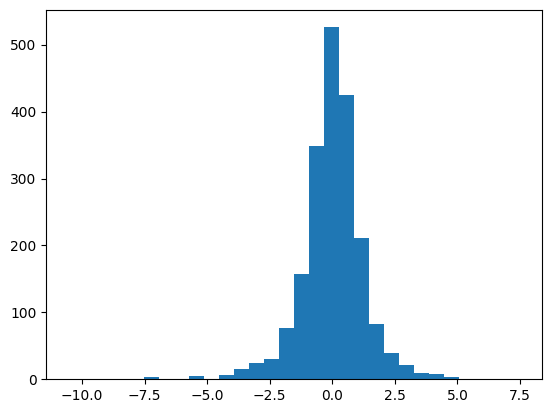

In [39]:
plt.hist(model.coef_[0], bins=30)

In [42]:
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo"]

# Transformar la entrada con el Vectorizador
x = vectorizer.transform(prueba)

In [43]:
# Predecir con el modelo
P = model.predict(x)

In [44]:
# Obetener las clases del modelo
clases = model.classes_

In [50]:
# Mostrar la clase predicha
for i in range(len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo


# Con Multiples categorias de sentimientos

In [62]:
# Define los nombres de las columnas
column_names = ['indice', 'plataforma', 'categoria', 'comentarios']

In [63]:
df = pd.read_csv("./11-sentimientos/twitter_validation.csv", names=column_names, header=0)

In [64]:
df.head()

,indice,plataforma,categoria,comentarios
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


<Axes: >

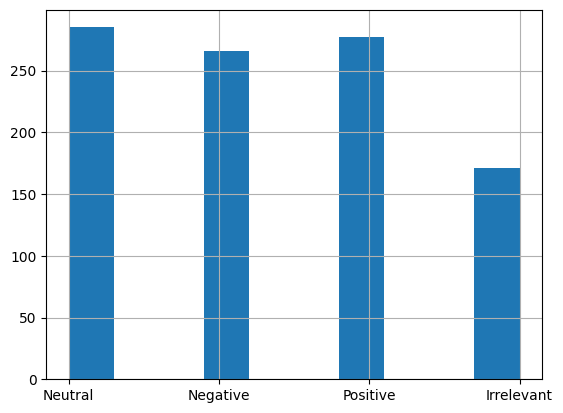

In [65]:
df["categoria"].hist()

In [66]:
target_map = {"Positive": 1, "Negative": 0,"Neutral":2,"Irrelevant":3}

In [68]:
df["target"] = df["categoria"].map(target_map)
df

,indice,plataforma,categoria,comentarios,target
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0
3,4433,Google,Neutral,Now the President is slapping Americans in the...,2
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,0
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,3
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,3
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,1
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,1


In [69]:
df_train, df_test = train_test_split(df)

In [71]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train["comentarios"])
X_train

<749x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11964 stored elements in Compressed Sparse Row format>

In [72]:
X_test = vectorizer.transform(df_test["comentarios"])
X_test

<250x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3440 stored elements in Compressed Sparse Row format>

In [73]:
Y_train = df_train["target"]
Y_test = df_test["target"]

In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc: ", model.score(X_train, Y_train))
print("Test acc: ", model.score(X_test, Y_test))

Train acc:  0.8945260347129506
Test acc:  0.508


In [75]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [76]:
cm = confusion_matrix(Y_train,P_train,normalize="true")
cm

array([[0.96039604, 0.0049505 , 0.02970297, 0.0049505 ],
       [0.02985075, 0.92039801, 0.04975124, 0.        ],
       [0.03791469, 0.03317536, 0.92890995, 0.        ],
       [0.1037037 , 0.11851852, 0.07407407, 0.7037037 ]])

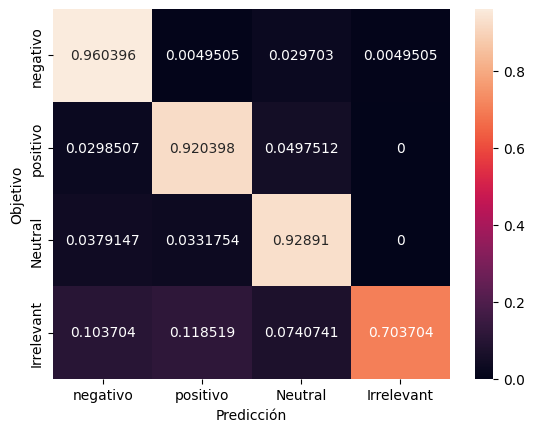

In [77]:
def plot_cm(cm):
    classes = ["negativo", "positivo","Neutral", "Irrelevant"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")
    
plot_cm(cm)

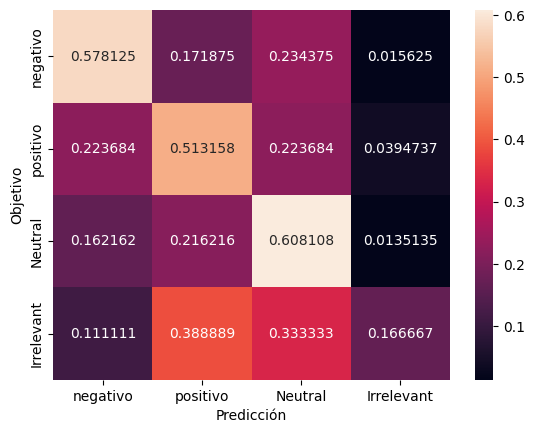

In [78]:
cm = confusion_matrix(Y_test,P_test,normalize="true")
plot_cm(cm)